<a href="https://colab.research.google.com/github/Praks21/Stock_Market_prediction/blob/main/stock_price_jaanlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [4]:
def get_stock_data(symbol, start_date, end_date):
 stock_data = yf.download(symbol, start=start_date, end=end_date)
 return stock_data
# Specify stock symbol and date range
stock_symbol = 'AAPL'
# Fetch historical stock data
stock_data = yf.download(stock_symbol,  period="max")

[*********************100%***********************]  1 of 1 completed


In [5]:
# Code snippet for data preprocessing
closing_prices = stock_data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices)

In [6]:
# Define the prepare_data function
def prepare_data(data, n_steps):
    x, y = [], []
    for i in range(len(data) - n_steps):
        x.append(data[i:(i + n_steps), 0])
        y.append(data[i + n_steps, 0])
    return np.array(x), np.array(y)

def create_lstm_model(input_shape):
    """
    Create and compile an LSTM model for time series prediction.

    Parameters:
    - input_shape (tuple): Shape of the input data in the form (time_steps, features).

    Returns:
    - model (Sequential): Compiled LSTM model.
    """
    model = Sequential()
    # Add the first LSTM layer with 50 units and return sequences for the next layer
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    # Add the second LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add a Dense layer with 1 unit for regression
    model.add(Dense(units=1))

    # Compile the model using the Adam optimizer and Mean Squared Error loss
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model


# Code snippet for creating and training the LSTM model
n_steps = 60

# Prepare the training data using the defined function
x_train, y_train = prepare_data(closing_prices_scaled, n_steps)

# Reshape the input data to fit the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Create an instance of the LSTM model
model = create_lstm_model((x_train.shape[1], 1))

# Train the model on the training data
model.fit(x_train, y_train, epochs=10, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 26s 64ms/step - loss: 0.0031
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 38s 55ms/step - loss: 1.1499e-04
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - loss: 8.1911e-05
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - loss: 7.0631e-05
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 39s 58ms/step - loss: 7.0623e-05
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - loss: 6.6861e-05
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 5.6274e-05
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - loss: 6.3096e-05
Epoch 9/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - loss: 5.4124e-05
Epoch 10/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - loss: 4.6675e-05


In [7]:
# Code snippet for making predictions and evaluation
train_predictions = model.predict(x_train)
train_predictions = scaler.inverse_transform(train_predictions)
mse = mean_squared_error(closing_prices[n_steps:], train_predictions)
print(f'Mean Squared Error on Training Data: {mse}')

344/344 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step
Mean Squared Error on Training Data: 2.0913313839142713


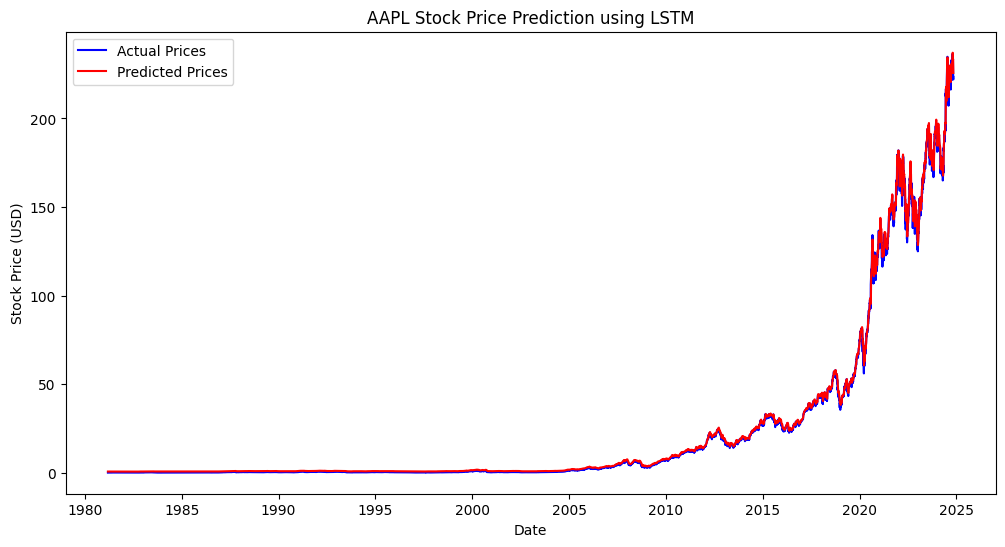

In [10]:
# Code snippet for plotting results
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index[n_steps:], closing_prices[n_steps:], label='Actual Prices', color='blue')
plt.plot(stock_data.index[n_steps:], train_predictions, label='Predicted Prices', color='red')
plt.title(f'{stock_symbol} Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()